# Bayesian inference
 
Suppose that we fit a model with parameters $\boldsymbol w$ to the dataset $\boldsymbol D = (\boldsymbol X, \boldsymbol y)$. According to the Bayes formula the posterior distribution

$$
    p(\boldsymbol w \vert \boldsymbol X, \boldsymbol y) \propto p(\boldsymbol y \vert \boldsymbol X, \boldsymbol w) p(\boldsymbol w).
$$

This is also written as

$$
    \mathrm{Posterior} = \frac{\mathrm{Likelihood}\times \mathrm{Prior}}{\mathrm{Evidence}}
$$

We are particularly interested in the posterior distribution because it allows us to make predictions.

**Q**. How to calculate evidence?

## Conjugate distributions

## Bayes rule

Since 

$$
p(\boldsymbol x , y) = p(\boldsymbol x \vert y) p(y) = p(y \vert \boldsymbol x) p(\boldsymbol x),
$$

we have

$$
    p(y \vert \boldsymbol x) = \frac{p(\boldsymbol x \vert y) p(y)}{p(\boldsymbol x)} = 
     \frac{p(\boldsymbol x \vert y)p(y)}{\int p(\boldsymbol x \vert y) p(y)\,dy}.
$$



### Discrete likelihood

Example with soccer dataset https://www.kaggle.com/datasets/irkaal/english-premier-league-results

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta, binom
import pandas as pd

Lets look at the data. The main columns that we'll work are **Season** and **FTR = Full Time Result (H=Home Win, D=Draw, A=Away Win)** 

In [3]:
df = pd.read_csv("dataset_for_bayes_inference/results.csv", encoding='latin-1')
df.tail()

,Season,DateTime,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HC,AC,HF,AF,HY,AY,HR,AR
11108,2021-22,2022-04-09T17:30:00Z,Aston Villa,Tottenham,0,4,A,0.0,1.0,A,...,8.0,5.0,9.0,3.0,12.0,14.0,2.0,3.0,0.0,0.0
11109,2021-22,2022-04-10T14:00:00Z,Brentford,West Ham,2,0,H,0.0,0.0,D,...,7.0,1.0,4.0,6.0,2.0,6.0,0.0,1.0,0.0,0.0
11110,2021-22,2022-04-10T14:00:00Z,Leicester,Crystal Palace,2,1,H,2.0,0.0,H,...,3.0,3.0,3.0,4.0,11.0,12.0,1.0,1.0,0.0,0.0
11111,2021-22,2022-04-10T14:00:00Z,Norwich,Burnley,2,0,H,1.0,0.0,H,...,6.0,4.0,6.0,7.0,12.0,10.0,1.0,1.0,0.0,0.0
11112,2021-22,2022-04-10T16:30:00Z,Man City,Liverpool,2,2,D,2.0,1.0,H,...,5.0,4.0,4.0,1.0,9.0,11.0,1.0,4.0,0.0,0.0


We will select matches of Home Teams (local teams) from 2015 season to 2020 and try to observe new data which will be matches from 2020-2021 season

In [7]:
selected_matches = df.query("Season in ['2015-16', '2016-17','2017-18', '2018-19', '2019-20']")
selected_matches_number = len(selected_matches)
print("Seasons from 2015 to 2020: ",selected_matches_number)

Seasons from 2015 to 2020:  1900


As a prior belief will be a win rate of the selected matches

In [8]:
home_wins = len(selected_matches[selected_matches['FTR'] == 'H'])
home_win_rate = round(home_wins/selected_matches_number,2)
print("Win rate: ", home_win_rate)

Win rate:  0.46


$\alpha$ and $\beta$ positive parameters control the shape of the distribution

In [9]:
alpha_param = home_win_rate * selected_matches_number
beta_param = selected_matches_number - alpha_param

print(alpha_param, beta_param)

874.0 1026.0


Selected matches from 2020 to 2021

In [15]:
selected_matches_20_21 = df.query("Season == '2020-21'")
selected_matches_20_21_num = len(selected_matches_20_21)

home_wins_20_21 = len(selected_matches_20_21[selected_matches_20_21['FTR'] == 'H'])
win_rate_20_21 = round(home_wins_20_21/selected_matches_20_21_num,2)

print(" Selected matches from 2020-21: ", selected_matches_20_21_num, "\n", "Win matches: ", home_wins_20_21, "\n", "Win rate: ", win_rate_20_21)

 Selected matches from 2020-21:  380 
 Win matches:  144 
 Win rate:  0.38


Lets calculate prior, likelihood and posterior of our selected data

In [16]:
n = selected_matches_20_21_num
y = home_wins_20_21

theta = np.linspace(0,1,1000) # parameter array represents a possible value of the parameter for your beta distribution

prior = beta.pdf(theta, alpha_param, beta_param)
likelihood = binom.pmf(y, n, theta) 
posterior = beta.pdf(theta, alpha_param + y, beta_param + (n-y)) 


In [17]:
def plot_show(theta, prior, likelihood, posterior):
    plt.figure(figsize=(10, 6))

    plt.plot(theta, prior, label="prior")
    plt.plot(theta, 1000 * likelihood, label="likelihood")
    plt.plot(theta, posterior, label="posterior")

    plt.ylabel("Values")
    plt.xlabel("$\Theta$")
    plt.xlim([0, 1])
    plt.legend()
    plt.xticks(np.arange(0, 1.1, 0.1))
    plt.show()

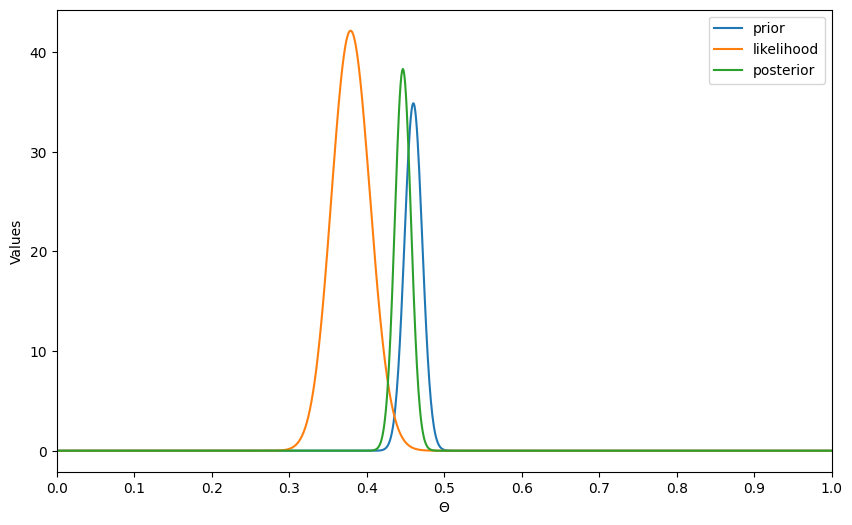

In [18]:
plot_show(theta, prior, likelihood, posterior)